# DSC540 Project 2

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.

> **Once you have completed your project, and you are done with coding restart your kernel and run everything. Make sure it runs without errors.**  
    - For this go to the very top where the tabs are located:
        - Kernel  
            - Restart & Run All  
    - We will check whether the code and results in this notebook is running fine.  


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
    3. The label predictions as csv file. -> See last question.

Good Luck!

### Daniel O'Brien

**Honor Pledge:**  
I pledge on my honor that I, **Daniel O'Brien**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 



## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided. 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import sklearn
sklearn.__version__

'0.23.1'

In [3]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read loan_data.csv as a dataframe called loans.**

In [5]:
loans = pd.read_csv('loans_train.csv')
loans_outcome_not_known = pd.read_csv('loans_outcome_not_known.csv')

In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,credit_card,0.0800,101.85,10.596635,10.26,747,7560.000000,18467,30.9,3,0,0,0
1,1,all_other,0.1114,328.04,10.530495,14.13,722,1920.000000,6811,56.8,0,0,0,0
2,1,debt_consolidation,0.1324,676.20,11.289782,20.73,697,4080.000000,16805,64.1,0,0,0,0
3,1,debt_consolidation,0.1103,671.44,10.555813,15.72,722,3580.041667,31566,32.3,1,0,0,1
4,0,debt_consolidation,0.1545,244.21,10.308953,18.80,647,1950.041667,4587,41.0,2,0,0,0


In [7]:
loans_outcome_not_known.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1324,540.96,10.596635,11.73,672,3210.000000,5671,55.1,0,0,0
1,0,educational,0.1221,333.15,11.156193,15.82,707,5314.000000,107643,81.0,3,0,0
2,1,debt_consolidation,0.1218,166.50,10.753836,6.38,772,1440.000000,233,6.7,0,0,0
3,0,major_purchase,0.1461,124.12,10.239960,0.00,692,1530.041667,0,0.0,6,0,0
4,1,credit_card,0.0800,156.69,10.434116,15.85,767,10170.000000,5748,12.3,0,1,0


**Check out the info(), head(), and describe() methods on loans.**

In [8]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7478 non-null   int64  
 1   purpose            7478 non-null   object 
 2   int.rate           7478 non-null   float64
 3   installment        7478 non-null   float64
 4   log.annual.inc     7478 non-null   float64
 5   dti                7478 non-null   float64
 6   fico               7478 non-null   int64  
 7   days.with.cr.line  7478 non-null   float64
 8   revol.bal          7478 non-null   int64  
 9   revol.util         7478 non-null   float64
 10  inq.last.6mths     7478 non-null   int64  
 11  delinq.2yrs        7478 non-null   int64  
 12  pub.rec            7478 non-null   int64  
 13  not.fully.paid     7478 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 818.0+ KB


In [9]:
loans.shape

(7478, 14)

In [10]:
loans_outcome_not_known.shape

(2100, 13)

### For the loans train dataset, there are 7,478 rows and 14 columns and for the loans_outcome_not_known there are 2,100 rows and 13 columns. The column included in the loans train dataset, that is missing from the loans outcomes not know dataset, is the not.fully.paid column which indicates whether loans have been fully repaid or not.

In [11]:
count = loans['not.fully.paid'].value_counts()
count

0    6045
1    1433
Name: not.fully.paid, dtype: int64

### The two uniques values for 'not.fully.paid' are 0 and 1. There are 6,045 rows with a value of 0 and 1,433 rows with a value of 1.

In [12]:
prop1 = 1433 / (1433 + 6045)
prop1

0.19162877774806097

### About 19% of people who took out loans did not fully pay back their loans.

# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

## Exploratory Data Analysis

- Let's do some data visualization! 
- You can use many different visualization libraries including matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2ce398880>,
      dtype=object)

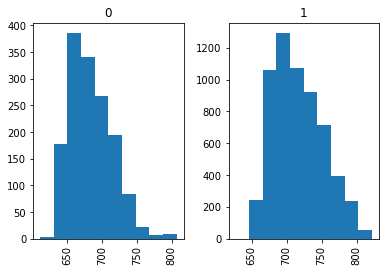

In [13]:
loans.hist(column='fico', by='credit.policy')

In [14]:
CreditGood = loans.loc[loans['credit.policy']==1]
CreditBad = loans.loc[loans['credit.policy']==0]

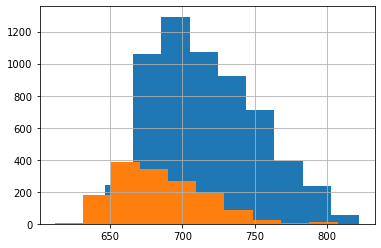

In [15]:
CreditGood['fico'].hist()
CreditBad['fico'].hist()

### The histograms above, show that when customers meet the credit criteria they have higher FICO scores overall, than customers who do not meet the credit underwriting criteria.

**Create a similar figure, except this time select by the not.fully.paid column.**

In [16]:
FullyPaid = loans.loc[loans['not.fully.paid']==0]
NotFullyPaid = loans.loc[loans['not.fully.paid']==1]

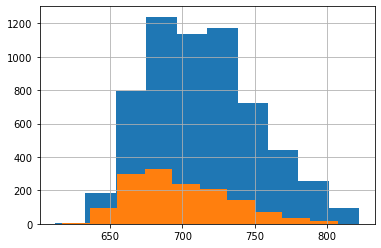

In [17]:
FullyPaid['fico'].hist()
NotFullyPaid['fico'].hist()

### The histogram above shows that customers who fully paid back their loans have higher FICO scores than customers who did not pay back their loans.

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

[Text(0, 0, 'credit_card'),
 Text(0, 0, 'all_other'),
 Text(0, 0, 'debt_consolidation'),
 Text(0, 0, 'home_improvement'),
 Text(0, 0, 'major_purchase'),
 Text(0, 0, 'small_business'),
 Text(0, 0, 'educational')]

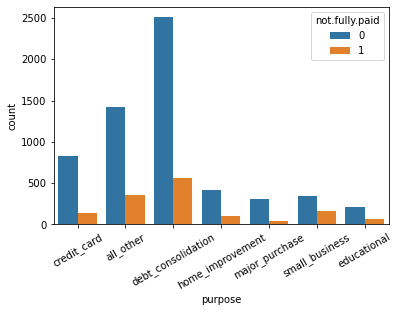

In [18]:
g = sns.countplot(x='purpose', data=loans, hue='not.fully.paid')
g.set_xticklabels(g.get_xticklabels(), rotation=30)


### The countplot above shows the distribution of loans across different loan types by whether or not customers paid back their loans.

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

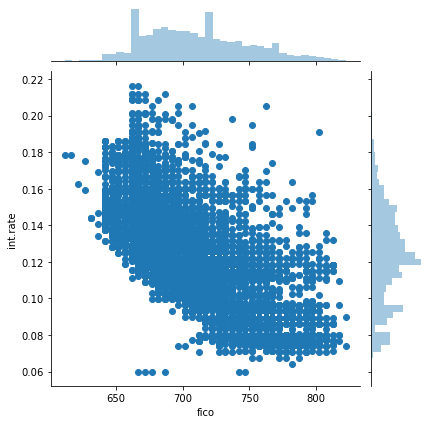

In [19]:
sns.jointplot(data=loans, x="fico", y="int.rate")

In [20]:
# YOUR CODE

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `credit.policy`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

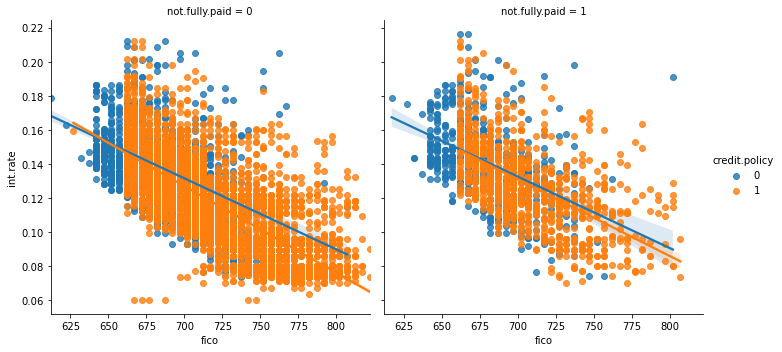

In [21]:
g = sns.lmplot(x='fico', y="int.rate", col="not.fully.paid", hue='credit.policy', data=loans)

In [22]:
# YOUR CODE

# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**Check loans.info() again.**

In [23]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7478 entries, 0 to 7477
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      7478 non-null   int64  
 1   purpose            7478 non-null   object 
 2   int.rate           7478 non-null   float64
 3   installment        7478 non-null   float64
 4   log.annual.inc     7478 non-null   float64
 5   dti                7478 non-null   float64
 6   fico               7478 non-null   int64  
 7   days.with.cr.line  7478 non-null   float64
 8   revol.bal          7478 non-null   int64  
 9   revol.util         7478 non-null   float64
 10  inq.last.6mths     7478 non-null   int64  
 11  delinq.2yrs        7478 non-null   int64  
 12  pub.rec            7478 non-null   int64  
 13  not.fully.paid     7478 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 818.0+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies().

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [24]:
cat_feats = ['purpose']

> The same transformation needs to be aplied on every dataset. The easiest way would be to merge train and test (loans_outcome_not_known) sets, and to split after the transformation.

In [25]:
loanTest = pd.get_dummies(loans_outcome_not_known,columns=cat_feats)
loanTest.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1324,540.96,10.596635,11.73,672,3210.000000,5671,55.1,0,0,0,0,0,1,0,0,0,0
1,0,0.1221,333.15,11.156193,15.82,707,5314.000000,107643,81.0,3,0,0,0,0,0,1,0,0,0
2,1,0.1218,166.50,10.753836,6.38,772,1440.000000,233,6.7,0,0,0,0,0,1,0,0,0,0
3,0,0.1461,124.12,10.239960,0.00,692,1530.041667,0,0.0,6,0,0,0,0,0,0,0,1,0
4,1,0.0800,156.69,10.434116,15.85,767,10170.000000,5748,12.3,0,1,0,0,1,0,0,0,0,0


In [26]:
loanDF = pd.get_dummies(loans, columns=cat_feats)
loanDF.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.0800,101.85,10.596635,10.26,747,7560.000000,18467,30.9,3,0,0,0,0,1,0,0,0,0,0
1,1,0.1114,328.04,10.530495,14.13,722,1920.000000,6811,56.8,0,0,0,0,1,0,0,0,0,0,0
2,1,0.1324,676.20,11.289782,20.73,697,4080.000000,16805,64.1,0,0,0,0,0,0,1,0,0,0,0
3,1,0.1103,671.44,10.555813,15.72,722,3580.041667,31566,32.3,1,0,0,1,0,0,1,0,0,0,0
4,0,0.1545,244.21,10.308953,18.80,647,1950.041667,4587,41.0,2,0,0,0,0,0,1,0,0,0,0


In [282]:
loans_Unknown = pd.get_dummies(loans_outcome_not_known, columns=cat_feats)
loans_Unknown.head

<bound method NDFrame.head of       credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1324       540.96       10.596635  11.73   672   
1                 0    0.1221       333.15       11.156193  15.82   707   
2                 1    0.1218       166.50       10.753836   6.38   772   
3                 0    0.1461       124.12       10.239960   0.00   692   
4                 1    0.0800       156.69       10.434116  15.85   767   
...             ...       ...          ...             ...    ...   ...   
2095              1    0.1183        53.02       11.058795  12.26   712   
2096              1    0.1218       266.40       10.757903   2.32   762   
2097              1    0.1758       503.19       11.362103  21.93   662   
2098              1    0.1316       121.58       10.126631   9.79   697   
2099              1    0.0894       158.86       10.915016  20.14   727   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delin

**Now you can use `pd.get_dummies(loans,columns=cat_feats)` to create a fixed larger dataframe that has new feature columns with dummy variables.**

## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = loanDF.drop('not.fully.paid',axis=1)
y = loanDF['not.fully.paid']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=2020)

# Q4

## Decision Tree Model

Let's start by training a single decision tree first!


- Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `min_samples_split` hyper-parameter and apply cross validation to find the best value.  
    - Select the `max_depth` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Plot the decision tree of the best model
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [29]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [30]:
clf = DecisionTreeClassifier()

In [31]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
predTrain = clf.predict(X_train)

In [33]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

1.0

In [34]:
predTest = clf.predict(X_val)

In [35]:
accuracyTest = metrics.accuracy_score (y_true = y_val, y_pred = predTest)
accuracyTest

0.7058823529411765

## Accuracy for Decision Tree
### Training Accuracy is 1.0
### Testing Accuracy is 0.71

In [36]:
confusion_matrix(y_val, predTest)

array([[1472,  335],
       [ 325,  112]])

In [37]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.2562929061784897

### Recall
#### TP/(TP + FN)
#### The Recall value is 0.26. This can be found by dividing the number of true positives (112) by the true positives plus false negatives (112 + 325)

In [38]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val, y_pred = predTest).ravel()
specificity = tn / (tn+fp)
specificity

0.8146098505810736

### Specificity 
#### The Specificity is 0.81, the specificity is found by dividing the true negatives (1472) by the sum of true negatives (1472) and false positives (335). 

In [39]:
metrics.precision_score(y_true = y_val, y_pred = predTest)

0.2505592841163311

### Precision
#### TP/(TP+FP)
#### The precision is 0.25. This can be found by dividing the true positives (112) by the true positives plus the false positives (112+335)

In [40]:
metrics.balanced_accuracy_score(y_true = y_val, y_pred = predTest, sample_weight=None, adjusted=False)

0.5354513783797816

### Balanced Accuracy has a score of 0.53

In [41]:
sklearn.metrics.f1_score(y_true = y_val, y_pred = predTest)

0.253393665158371

### F1 Score of 0.25

In [42]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [43]:
parameters = {
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_depth': [1, 2, 4, 8, 16, None]
}

In [44]:
cv = GridSearchCV(clf, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'max_depth': 1, 'min_samples_split': 2}

0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 2}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 3}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 4}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 5}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 6}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 7}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 8}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 9}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 10}
0.81 (+/-0.001) for {'max_depth': 2, 'min_samples_split': 2}
0.81 (+/-0.001) for {'max_depth': 2, 'min_samples_split': 3}
0.81 (+/-0.001) for {'max_depth': 2, 'min_samples_split': 4}
0.81 (+/-0.001) for {'max_depth': 2, 'min_samples_split': 5}
0.81 (+/-0.001) for {'max_depth': 2, 'min_samples_split': 6}
0.81 (+/-0.001) for {'max_depth': 2, 'min_samples_split': 7}
0.81 (+/-0.001) for {'max_dep

### The best parameters found are for a max depth of 1 and a min samples split of 2
### Below we will fit the model with the aforementioned parameters and test the model for the relevant metrics

In [45]:
clf = DecisionTreeClassifier(max_depth=1, min_samples_split=2)

In [46]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [47]:
predTrain = clf.predict(X_train)

In [48]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

0.8097057699656095

In [49]:
predTest = clf.predict(X_val)

In [50]:
accuracyTest = metrics.accuracy_score (y_true = y_val, y_pred = predTest)
accuracyTest

0.8052584670231729

## Accuracy for Decision Tree
### Training Accuracy is 0.81
### Testing Accuracy is 0.81

In [51]:
confusion_matrix(y_val, predTest)

array([[1807,    0],
       [ 437,    0]])

#### One interesting observation regarding the confusion matrix, is that there are no false positives or true positives everything falls into true negatives or false negatives

In [52]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.0

### Recall
#### TP/(TP + FN)
#### The Recall value is 0, this is largely due to the absense of true positive values. This can be found by dividing the number of true positives (0) by the true positives plus false negatives (0) + (437)

In [53]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val, y_pred = predTest).ravel()
specificity = tn / (tn+fp)
specificity

1.0

### Specificity 
#### The Specificity is 1, the specificity is found by dividing the true negatives (1807) by the sum of true negatives (1807) and false positives (0).

In [54]:
metrics.precision_score(y_true = y_val, y_pred = predTest)

/Users/danielobrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

### Precision
#### TP/(TP+FP)
#### This returned a value of 0, although the actual answer cannot be computer because dividing by a zero cannot be computed. Therefore our result of having no true or false positives returns a strange result for precision.

In [55]:
metrics.balanced_accuracy_score(y_true = y_val, y_pred = predTest, sample_weight=None, adjusted=False)

0.5

### Balanced Accuracy has a score of 0.50, this is slightly lower than the previous balances accuracy score.

In [56]:
sklearn.metrics.f1_score(y_true = y_val, y_pred = predTest)

0.0

### F1 Score of 0, this is likely due to the zeros in the true and false positive categories

## In summary, the tuning of the model returned an accuracy value which initially seemed better than the accuracy of the untuned model. However, after tuning this model, we ended up with no false positives and no false positives which gave us strange answers for some of our metrics and very poor metrics for a few categories. 

# Q5

## Random Forest model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `min_samples_split` hyper-parameter and apply cross validation to find the best value.  
    - Select the `max_depth` hyper-parameter and apply cross validation to find the best value. 
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
clf = RandomForestClassifier()

In [59]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
predTrain = clf.predict(X_train)

In [61]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

1.0

In [62]:
predTest = clf.predict(X_val)

In [63]:
accuracyTest = metrics.accuracy_score (y_true = y_val, y_pred = predTest)
accuracyTest

0.8092691622103387

### Initially, with all default values, the random forest classifier returned a training accuracy score of 1 and a testing accuracy score of 0.81

In [64]:
confusion_matrix(y_val, predTest)

array([[1798,    9],
       [ 419,   18]])

In [65]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.041189931350114416

### Recall
#### TP/(TP + FN)
#### The Recall value is 0.04. This can be found by dividing the number of true positives (18) by the true positives plus false negatives (18 + 419)

In [66]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val, y_pred = predTest).ravel()
specificity = tn / (tn+fp)
specificity

0.9950193691200886

### Specificity 
#### The Specificity is 0.995, the specificity is found by dividing the true negatives (1798) by the sum of true negatives (1798) and false positives (9). 

In [67]:
metrics.precision_score(y_true = y_val, y_pred = predTest)

0.6666666666666666

### Precision
#### TP/(TP+FP)
#### The precision is 0.67. This can be found by dividing the true positives (18) by the true positives plus the false positives (18+9)

In [68]:
metrics.balanced_accuracy_score(y_true = y_val, y_pred = predTest, sample_weight=None, adjusted=False)

0.5181046502351015

### The balanced accuracy score is 0.52, this is lower than the other accuracy score.

In [69]:
sklearn.metrics.f1_score(y_true = y_val, y_pred = predTest)

0.07758620689655173

### The F1 score is 0.08

In [70]:
parameters = {
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_depth': [1, 2, 4, 8, 16, None],
    'n_estimators' : [5, 10, 20, 25, 50, 75, 100]
}

In [71]:
cv = GridSearchCV(clf, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 20}

0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 5}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 10}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 20}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 25}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 50}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 75}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 3, 'n_estimators': 5}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 3, 'n_estimators': 10}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 3, 'n_estimators': 20}
0.81 (+/-0.001) for {'max_depth': 1, 'min_samples_split': 3, 'n_estimators': 25}
0.81 (+/-0.001) for {'max_depth': 1

### According to the grid search, the following parameters are the best to use:
### max_depth = 8
### min_samples_split = 2
### n_estimators = 20

In [72]:
clf = RandomForestClassifier(max_depth = 8, min_samples_split = 2, n_estimators = 20)

In [73]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=20)

In [74]:
predTrain = clf.predict(X_train)

In [75]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

0.8293847917462743

In [76]:
predTest = clf.predict(X_val)

In [77]:
accuracyTest = metrics.accuracy_score (y_true = y_val, y_pred = predTest)
accuracyTest

0.8052584670231729

### Accuracy:
#### Training: 0.83
#### Testing: 0.81

In [78]:
confusion_matrix(y_val, predTest)

array([[1801,    6],
       [ 431,    6]])

In [79]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.013729977116704805

### Recall
#### TP/(TP + FN)
#### The Recall value is 0.014. This can be found by dividing the number of true positives (6) by the true positives plus false negatives (6 + 431)

In [80]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val, y_pred = predTest).ravel()
specificity = tn / (tn+fp)
specificity

0.9966795794133924

### Specificity 
#### The Specificity is 0.997, the specificity is found by dividing the true negatives (1801) by the sum of true negatives (1801) and false positives (6). 

In [81]:
metrics.precision_score(y_true = y_val, y_pred = predTest)

0.5

### Precision
#### TP/(TP+FP)
#### The precision is 0.5. This can be found by dividing the true positives (6) by the true positives plus the false positives (6+6)

In [82]:
metrics.balanced_accuracy_score(y_true = y_val, y_pred = predTest, sample_weight=None, adjusted=False)

0.5052047782650486

### The Balanced Accuracy Score for the tuned random forest is 0.51.

In [83]:
sklearn.metrics.f1_score(y_true = y_val, y_pred = predTest)

0.026726057906458798

### The F1 Score for the tuned random forest is 0.03.

### The F1 Score returned slightly lower from 0.06 to 0.03, both not a great score overall. The balanced accuracy score of 0.51 saw very little change from the balanced accuracy of the previous model at 0.52. Recall and Precision saw a very slight improvement, and specificity remained high for both models. 

# Q6

## Adaboost model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `learning_rate` hyper-parameter and apply cross validation to find the best value.  
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [84]:
from sklearn.ensemble import AdaBoostClassifier

In [85]:
clf = AdaBoostClassifier()

In [86]:
clf.fit(X_train, y_train)

AdaBoostClassifier()

In [87]:
predTrain = clf.predict(X_train)

In [88]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

0.815246465418418

In [89]:
predTest = clf.predict(X_val)

In [90]:
accuracyTest = metrics.accuracy_score (y_true = y_val, y_pred = predTest)
accuracyTest

0.803475935828877

### The accuracy for the training model is 0.82 and the accuracy for the testing model is 0.80.

In [91]:
confusion_matrix(y_val, predTest)

array([[1786,   21],
       [ 420,   17]])

In [92]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.038901601830663615

### Recall
#### TP/(TP + FN)
#### The Recall value is 0.04. This can be found by dividing the number of true positives (17) by the true positives plus false negatives (17 + 420)

In [93]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val, y_pred = predTest).ravel()
specificity = tn / (tn+fp)
specificity

0.9883785279468733

### Specificity 
#### The Specificity is 0.99, the specificity is found by dividing the true negatives (1786) by the sum of true negatives (1786) and false positives (21). 

In [94]:
metrics.precision_score(y_true = y_val, y_pred = predTest)

0.4473684210526316

### Precision
#### TP/(TP+FP)
#### The precision is 0.45. This can be found by dividing the true positives (17) by the true positives plus the false positives (17+21)

In [95]:
metrics.balanced_accuracy_score(y_true = y_val, y_pred = predTest, sample_weight=None, adjusted=False)

0.5136400648887685

### The model returned a balanced accuracy of 0.51

In [96]:
sklearn.metrics.f1_score(y_true = y_val, y_pred = predTest)

0.07157894736842106

### The model returned a F1 score of 0.07

In [97]:
parameters = {
    'learning_rate': [0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 1, 2],
    'n_estimators' : [5, 10, 20, 25, 50, 75, 100]
}

In [98]:
cv = GridSearchCV(clf, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'learning_rate': 0.2, 'n_estimators': 50}

0.81 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 5}
0.81 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 10}
0.81 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 20}
0.81 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 25}
0.81 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 50}
0.81 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 75}
0.81 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 100}
0.81 (+/-0.001) for {'learning_rate': 0.02, 'n_estimators': 5}
0.81 (+/-0.001) for {'learning_rate': 0.02, 'n_estimators': 10}
0.81 (+/-0.001) for {'learning_rate': 0.02, 'n_estimators': 20}
0.81 (+/-0.001) for {'learning_rate': 0.02, 'n_estimators': 25}
0.81 (+/-0.001) for {'learning_rate': 0.02, 'n_estimators': 50}
0.81 (+/-0.001) for {'learning_rate': 0.02, 'n_estimators': 75}
0.81 (+/-0.001) for {'learning_rate': 0.02, 'n_estimators': 100}
0.81 (+/-0.001) for {'learning_rate': 0.05, 'n_

### Based on the results of the grid search, I will choose the parameters below:
### Learning Rate: 0.2
### Number of Estimators: 50

In [99]:
clf = AdaBoostClassifier(learning_rate = 0.2, n_estimators = 50)

In [100]:
clf.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.2)

In [101]:
predTrain = clf.predict(X_train)

In [102]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

0.8098968284294994

In [103]:
predTest = clf.predict(X_val)

In [104]:
accuracyTest = metrics.accuracy_score (y_true = y_val, y_pred = predTest)
accuracyTest

0.8057040998217468

### The accuracy for the training model is 0.81 and the accuracy for the testing model is 0.81.

In [105]:
confusion_matrix(y_val, predTest)

array([[1807,    0],
       [ 436,    1]])

In [106]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.002288329519450801

### Recall
#### TP/(TP + FN)
#### The Recall value is 0.002. This can be found by dividing the number of true positives (1) by the true positives plus false negatives (1 + 436)

In [107]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val, y_pred = predTest).ravel()
specificity = tn / (tn+fp)
specificity

1.0

### Specificity 
#### The Specificity is 1, the specificity is found by dividing the true negatives (1807) by the sum of true negatives (1807) and false positives (0). 

In [108]:
metrics.precision_score(y_true = y_val, y_pred = predTest)

1.0

### Precision
#### TP/(TP+FP)
#### The precision is 1. This can be found by dividing the true positives (1) by the true positives plus the false positives (1+0)

In [109]:
metrics.balanced_accuracy_score(y_true = y_val, y_pred = predTest, sample_weight=None, adjusted=False)

0.5011441647597255

### The balanced accuracy score is 0.5

In [110]:
sklearn.metrics.f1_score(y_true = y_val, y_pred = predTest)

0.0045662100456621

### The F1 Score is 0.005

### Similar to the results with the decision tree above, the tuning of this model returned a model with a very low number of True Positives (1) and no False Positives. This result returned some metrics really high and other metrics really low.
### The F1 score of the tuned model (0.005) was lower than the untuned model (0.07), although both were poor overall. There was not much change in the balanced accuracy score. The precision score (up to 1 from 0.45) was much higher, but this is misleading. The precision score increased so much because there was an absense of false positive values and only 1 true positive value. 

# Q7

## Gradient Boost model

- Initiate the Random Forest classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
- Fit the model
- Make predictions
- Calculate accuracy score. What are the **training** and **testing** accuracies of the model?
- Create confusion matrix
- Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
     - Recall (Sensitivity)
     - Specificity
     - Precision
     - Balanced Accuracy
     - F1 Score
- Using all the training data perform cross-validation:
    - Select the `learning_rate` hyper-parameter and apply cross validation to find the best value.  
    - Select the `n_estimators` hyper-parameter and apply cross validation to find the best value. 
    - Perform grid search where you check for combinations of these hyper-parameters.
        - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- For the best model:
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
         - Recall (Sensitivity)
         - Specificity
         - Precision
         - Balanced Accuracy
         - F1 Score
    - Compare the results to the model with default paramters. Any change?

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

In [114]:
clf = GradientBoostingClassifier()

In [115]:
clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [116]:
predTrain = clf.predict(X_train)

In [117]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

0.8291937332823844

In [118]:
predTest = clf.predict(X_val)

In [120]:
accuracyTest = metrics.accuracy_score(y_true = y_val, y_pred = predTest)
accuracyTest

0.8057040998217468

### The training accuracy score is 0.83 and the testing accuracy is 0.81

In [121]:
confusion_matrix(y_val, predTest)

array([[1791,   16],
       [ 420,   17]])

In [122]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.038901601830663615

### Recall
#### TP/(TP + FN)
#### The Recall value is 0.04. This can be found by dividing the number of true positives (17) by the true positives plus false negatives (17 + 420)

In [123]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val, y_pred = predTest).ravel()
specificity = tn / (tn+fp)
specificity

0.9911455451023796

### Specificity 
#### The Specificity is 0.99, the specificity is found by dividing the true negatives (1791) by the sum of true negatives (1791) and false positives (16). 

In [124]:
metrics.precision_score(y_true = y_val, y_pred = predTest)

0.5151515151515151

### Precision
#### TP/(TP+FP)
#### The precision is 0.52. This can be found by dividing the true positives (17) by the true positives plus the false positives (17+16)

In [125]:
metrics.balanced_accuracy_score(y_true = y_val, y_pred = predTest, sample_weight=None, adjusted=False)

0.5150235734665216

### The Balanced Accuracy Score for this model is 0.52

In [126]:
sklearn.metrics.f1_score(y_true = y_val, y_pred = predTest)

0.0723404255319149

### The F1 Score is 0.07

In [127]:
parameters = {
    'learning_rate': [0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.5, 0.8, 1, 2],
    'n_estimators' : [5, 10, 20, 25, 50, 75, 100]
}

In [128]:
cv = GridSearchCV(clf, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'learning_rate': 0.08, 'n_estimators': 25}

0.81 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 5}
0.81 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 10}
0.81 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 20}
0.81 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 25}
0.81 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 50}
0.81 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 75}
0.81 (+/-0.001) for {'learning_rate': 0.01, 'n_estimators': 100}
0.81 (+/-0.001) for {'learning_rate': 0.02, 'n_estimators': 5}
0.81 (+/-0.001) for {'learning_rate': 0.02, 'n_estimators': 10}
0.81 (+/-0.001) for {'learning_rate': 0.02, 'n_estimators': 20}
0.81 (+/-0.001) for {'learning_rate': 0.02, 'n_estimators': 25}
0.81 (+/-0.001) for {'learning_rate': 0.02, 'n_estimators': 50}
0.809 (+/-0.002) for {'learning_rate': 0.02, 'n_estimators': 75}
0.809 (+/-0.003) for {'learning_rate': 0.02, 'n_estimators': 100}
0.81 (+/-0.001) for {'learning_rate': 0.05, 

### The parameters chosen for the Gradient Boost Classifier are as follows:
### Learning Rate: 0.08
### Number of Estimators: 25 

In [129]:
clf = GradientBoostingClassifier(learning_rate = 0.08, n_estimators = 25)

In [130]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.08, n_estimators=25)

In [131]:
predTrain = clf.predict(X_train)

In [132]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

0.8121895299961789

In [133]:
predTest = clf.predict(X_val)

In [134]:
accuracyTest = metrics.accuracy_score(y_true = y_val, y_pred = predTest)
accuracyTest

0.8057040998217468

### The accuracy for the training set is 0.81 and the accuracy for the testing set is 0.81

In [135]:
confusion_matrix(y_val, predTest)

array([[1805,    2],
       [ 434,    3]])

In [136]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.006864988558352402

### Recall
#### TP/(TP + FN)
#### The Recall value is 0.007. This can be found by dividing the number of true positives (3) by the true positives plus false negatives (3 + 434)

In [137]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val, y_pred = predTest).ravel()
specificity = tn / (tn+fp)
specificity

0.9988931931377975

### Specificity 
#### The Specificity is 0.999, the specificity is found by dividing the true negatives (1805) by the sum of true negatives (1805) and false positives (2). 

In [138]:
metrics.precision_score(y_true = y_val, y_pred = predTest)

0.6

### Precision
#### TP/(TP+FP)
#### The precision is 0.6. This can be found by dividing the true positives (3) by the true positives plus the false positives (3+2)

In [139]:
metrics.balanced_accuracy_score(y_true = y_val, y_pred = predTest, sample_weight=None, adjusted=False)

0.5028790908480749

### The balanced accuracy is 0.5

In [140]:
sklearn.metrics.f1_score(y_true = y_val, y_pred = predTest)

0.013574660633484162

### The F1 Score is 0.14

### After tuning the model, most metric declined slightly. There was a slight improvement in both Specificity and Precision.

# Q8

- Using the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the accuracy and list at least two possibilities.
    - Implement both of the methods you proposed. 
    - Is the model recall increasing? Why do you think this might have helped?
    - If both of them did not improve, comment on why this might have been the case.
    - Optional: Apply different things and see if the recall is improving

## Decision Tree
### Since I got strange results after tuning the model, I will use my default parameters of the decision tree as a starting point. The two methods I will try to see if I can get better results are adjusting the ccp_alpha value and I will try adjusting the criterion to include entropy to see if there is any improvement.

In [141]:
clf = DecisionTreeClassifier()

In [142]:
parameters = {
    'criterion': ['gini', 'entropy'],
    'ccp_alpha' : [0, 0.01, 0.02, 0.05, 0.07, 0.1, 0.2, 0.5, 0.8, 1, 2, 5, 10]
}

In [143]:
cv = GridSearchCV(clf, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'ccp_alpha': 0.01, 'criterion': 'gini'}

0.702 (+/-0.02) for {'ccp_alpha': 0, 'criterion': 'gini'}
0.705 (+/-0.014) for {'ccp_alpha': 0, 'criterion': 'entropy'}
0.81 (+/-0.001) for {'ccp_alpha': 0.01, 'criterion': 'gini'}
0.81 (+/-0.001) for {'ccp_alpha': 0.01, 'criterion': 'entropy'}
0.81 (+/-0.001) for {'ccp_alpha': 0.02, 'criterion': 'gini'}
0.81 (+/-0.001) for {'ccp_alpha': 0.02, 'criterion': 'entropy'}
0.81 (+/-0.001) for {'ccp_alpha': 0.05, 'criterion': 'gini'}
0.81 (+/-0.001) for {'ccp_alpha': 0.05, 'criterion': 'entropy'}
0.81 (+/-0.001) for {'ccp_alpha': 0.07, 'criterion': 'gini'}
0.81 (+/-0.001) for {'ccp_alpha': 0.07, 'criterion': 'entropy'}
0.81 (+/-0.001) for {'ccp_alpha': 0.1, 'criterion': 'gini'}
0.81 (+/-0.001) for {'ccp_alpha': 0.1, 'criterion': 'entropy'}
0.81 (+/-0.001) for {'ccp_alpha': 0.2, 'criterion': 'gini'}
0.81 (+/-0.001) for {'ccp_alpha': 0.2, 'criterion': 'entropy'}
0.81 (+/-0.001) for {'ccp_alpha': 0.5, 'criterion': 'gini'}
0.81 (+/-0.001) for

### It appears, based on the grid search above, that Gini index will continue to be the best criterion and a ccp_alpha value of 0.01 will return the highest score.

In [144]:
clf = DecisionTreeClassifier(ccp_alpha = 0.01)

In [145]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [146]:
predTrain = clf.predict(X_train)

In [147]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

0.8097057699656095

In [148]:
predTest = clf.predict(X_val)

In [149]:
accuracyTest = metrics.accuracy_score(y_true = y_val, y_pred = predTest)
accuracyTest

0.8052584670231729

### The original accuracy for decision trees is 1 for training and 0.71 for testing. This tuning showed improvement by bringing down the training accuracy but increasing the testing accuracy. After tuning the training accuracy is 0.81 and the testing accuracy is 0.81

In [150]:
confusion_matrix(y_val, predTest)

array([[1807,    0],
       [ 437,    0]])

In [151]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.0

### Similar to what was seen before when tuning the decision tree model, the model classified no true or false positives. This results in the recall score being 0.

## Random Forest
### For Random Forest, I will keep the optimal parameters found in the earlier pruning while also changing the max_features setting and the min_samples_leaf to see if this model can return a better result

In [152]:
clf = RandomForestClassifier(max_depth = 8, min_samples_split = 2, n_estimators = 20)

In [155]:
parameters = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [156]:
cv = GridSearchCV(clf, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'max_features': 'log2', 'min_samples_leaf': 8}

0.809 (+/-0.002) for {'max_features': 'auto', 'min_samples_leaf': 1}
0.809 (+/-0.005) for {'max_features': 'auto', 'min_samples_leaf': 2}
0.808 (+/-0.004) for {'max_features': 'auto', 'min_samples_leaf': 3}
0.808 (+/-0.003) for {'max_features': 'auto', 'min_samples_leaf': 4}
0.808 (+/-0.004) for {'max_features': 'auto', 'min_samples_leaf': 5}
0.81 (+/-0.002) for {'max_features': 'auto', 'min_samples_leaf': 6}
0.809 (+/-0.004) for {'max_features': 'auto', 'min_samples_leaf': 7}
0.809 (+/-0.003) for {'max_features': 'auto', 'min_samples_leaf': 8}
0.809 (+/-0.004) for {'max_features': 'auto', 'min_samples_leaf': 9}
0.81 (+/-0.002) for {'max_features': 'auto', 'min_samples_leaf': 10}
0.808 (+/-0.002) for {'max_features': 'sqrt', 'min_samples_leaf': 1}
0.808 (+/-0.006) for {'max_features': 'sqrt', 'min_samples_leaf': 2}
0.81 (+/-0.003) for {'max_features': 'sqrt', 'min_samples_leaf': 3}
0.808 (+/-0.002) for {'max_features': 'sqrt

### The optimal parameters are found below:
#### max_features: log2
#### min_samples_leaf: 8

In [157]:
clf = RandomForestClassifier(max_depth = 8, min_samples_split = 2, n_estimators = 20, max_features = 'log2', min_samples_leaf = 8)

In [158]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=8,
                       n_estimators=20)

In [159]:
predTrain = clf.predict(X_train)

In [160]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

0.8148643484906382

In [161]:
predTest = clf.predict(X_val)

In [162]:
accuracyTest = metrics.accuracy_score(y_true = y_val, y_pred = predTest)
accuracyTest

0.8070409982174688

### The training accuracy is 0.815 and the testing accuracy is 0.807. The training accuracy had a slight dip and the testing accuracy had a very slight increase from 0.805 to 0.807

In [163]:
confusion_matrix(y_val, predTest)

array([[1806,    1],
       [ 432,    5]])

In [164]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.011441647597254004

### The Recall score returned at 0.011, this is a very slight dip from the previous random forest recall of 0.0137.

## Adaboost Classifier
### The two modification I will make to the Adaboost Classifier is to change the algorithm from the default algorithm and try different random states. 

In [165]:
clf = AdaBoostClassifier(learning_rate = 0.2, n_estimators = 50)

In [166]:
parameters = {
    'algorithm': ['SAMME', 'SAMME.R'],
    'random_state' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 1031]
}

In [167]:
cv = GridSearchCV(clf, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'algorithm': 'SAMME.R', 'random_state': 1}

0.81 (+/-0.001) for {'algorithm': 'SAMME', 'random_state': 1}
0.81 (+/-0.001) for {'algorithm': 'SAMME', 'random_state': 2}
0.81 (+/-0.001) for {'algorithm': 'SAMME', 'random_state': 3}
0.81 (+/-0.001) for {'algorithm': 'SAMME', 'random_state': 4}
0.81 (+/-0.001) for {'algorithm': 'SAMME', 'random_state': 5}
0.81 (+/-0.001) for {'algorithm': 'SAMME', 'random_state': 6}
0.81 (+/-0.001) for {'algorithm': 'SAMME', 'random_state': 7}
0.81 (+/-0.001) for {'algorithm': 'SAMME', 'random_state': 8}
0.81 (+/-0.001) for {'algorithm': 'SAMME', 'random_state': 9}
0.81 (+/-0.001) for {'algorithm': 'SAMME', 'random_state': 10}
0.81 (+/-0.001) for {'algorithm': 'SAMME', 'random_state': 50}
0.81 (+/-0.001) for {'algorithm': 'SAMME', 'random_state': 1031}
0.81 (+/-0.001) for {'algorithm': 'SAMME.R', 'random_state': 1}
0.81 (+/-0.001) for {'algorithm': 'SAMME.R', 'random_state': 2}
0.81 (+/-0.001) for {'algorithm': 'SAMME.R', 'random_state': 3}
0

In [174]:
clf = AdaBoostClassifier(learning_rate = 0.2, n_estimators = 50, algorithm = 'SAMME', random_state = 1)

In [175]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.2, random_state=1)

In [176]:
predTrain = clf.predict(X_train)

In [177]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

0.8097057699656095

In [178]:
predTest = clf.predict(X_val)

In [179]:
accuracyTest = metrics.accuracy_score(y_true = y_val, y_pred = predTest)
accuracyTest

0.8052584670231729

### The training accuracy score is 0.8097 and the testing accuracy is 0.8052, there is a very slight dip previous accuracy scores

In [180]:
confusion_matrix(y_val, predTest)

array([[1807,    0],
       [ 437,    0]])

In [181]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.0

### The recall score is 0, this is due to the absence of true and false positive classifications. Which is slightly worse than the previous recall score because there was 1 true positive value

## Gradient Boost
### We will adjust the criterion and the minimum samples split to see if we can improve our gradient boost classifier

In [198]:
clf = GradientBoostingClassifier(learning_rate = 0.08, n_estimators = 25)

In [188]:
parameters = {
    'criterion': ['friedman_mse', 'mse', 'mae'],
    'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [189]:
cv = GridSearchCV(clf, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'criterion': 'friedman_mse', 'min_samples_split': 3}

0.81 (+/-0.002) for {'criterion': 'friedman_mse', 'min_samples_split': 2}
0.81 (+/-0.002) for {'criterion': 'friedman_mse', 'min_samples_split': 3}
0.81 (+/-0.002) for {'criterion': 'friedman_mse', 'min_samples_split': 4}
0.81 (+/-0.002) for {'criterion': 'friedman_mse', 'min_samples_split': 5}
0.81 (+/-0.002) for {'criterion': 'friedman_mse', 'min_samples_split': 6}
0.81 (+/-0.002) for {'criterion': 'friedman_mse', 'min_samples_split': 7}
0.81 (+/-0.002) for {'criterion': 'friedman_mse', 'min_samples_split': 8}
0.81 (+/-0.002) for {'criterion': 'friedman_mse', 'min_samples_split': 9}
0.81 (+/-0.002) for {'criterion': 'friedman_mse', 'min_samples_split': 10}
0.81 (+/-0.002) for {'criterion': 'mse', 'min_samples_split': 2}
0.81 (+/-0.002) for {'criterion': 'mse', 'min_samples_split': 3}
0.81 (+/-0.002) for {'criterion': 'mse', 'min_samples_split': 4}
0.81 (+/-0.002) for {'criterion': 'mse', 'min_samples_split': 5}
0.81 

In [190]:
clf = GradientBoostingClassifier(criterion ='friedman_mse', min_samples_split = 3, learning_rate = 0.08, n_estimators = 25)

In [191]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.08, min_samples_split=3,
                           n_estimators=25)

In [192]:
predTrain = clf.predict(X_train)

In [193]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

0.8121895299961789

In [194]:
predTest = clf.predict(X_val)

In [195]:
accuracyTest = metrics.accuracy_score(y_true = y_val, y_pred = predTest)
accuracyTest

0.8057040998217468

### The training accuracy score is 0.812 and the testing accuracy is 0.806, there is a very slight dip previous accuracy scores

In [196]:
confusion_matrix(y_val, predTest)

array([[1805,    2],
       [ 434,    3]])

In [197]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.006864988558352402

### The recall score is 0.0069.

# Q9

- Choose the best fitted model for each of teh classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the test set:
    - Create confusion matrix for each model
    - Either using the confusion matrix or the methods in `sklearn.metrics` get the following metrics on the testing set:
        - Recall (Sensitivity)
        - Specificity
        - Precision
        - Balanced Accuracy
        - F1 Score

## Decision Tree
### When I tuned the decision tree model, I ended up with strange results where there were no false or true positive values, so I will use the default parameters for my final decision tree model.

In [200]:
DT = DecisionTreeClassifier()

In [201]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [202]:
predTrain = DT.predict(X_train)

In [203]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

1.0

In [204]:
predTest = DT.predict(X_val)

In [205]:
accuracyTest = metrics.accuracy_score(y_true = y_val, y_pred = predTest)
accuracyTest

0.7018716577540107

In [206]:
confusion_matrix(y_val, predTest)

array([[1466,  341],
       [ 328,  109]])

In [207]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.2494279176201373

In [208]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val, y_pred = predTest).ravel()
specificity = tn / (tn+fp)
specificity

0.811289429994466

In [209]:
metrics.precision_score(y_true = y_val, y_pred = predTest)

0.24222222222222223

In [210]:
metrics.balanced_accuracy_score(y_true = y_val, y_pred = predTest, sample_weight=None, adjusted=False)

0.5303586738073016

In [211]:
sklearn.metrics.f1_score(y_true = y_val, y_pred = predTest)

0.245772266065389

## Random Forest

In [212]:
RF = RandomForestClassifier(max_depth = 8, min_samples_split = 2, n_estimators = 20, max_features = 'log2', min_samples_leaf = 8)

In [213]:
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=8,
                       n_estimators=20)

In [214]:
predTrain = RF.predict(X_train)

In [215]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

0.8169659915934276

In [217]:
predTest = RF.predict(X_val)

In [218]:
accuracyTest = metrics.accuracy_score(y_true = y_val, y_pred = predTest)
accuracyTest

0.8061497326203209

In [219]:
confusion_matrix(y_val, predTest)

array([[1804,    3],
       [ 432,    5]])

In [220]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.011441647597254004

In [221]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val, y_pred = predTest).ravel()
specificity = tn / (tn+fp)
specificity

0.9983397897066962

In [222]:
metrics.precision_score(y_true = y_val, y_pred = predTest)

0.625

In [223]:
metrics.balanced_accuracy_score(y_true = y_val, y_pred = predTest, sample_weight=None, adjusted=False)

0.5048907186519751

In [224]:
sklearn.metrics.f1_score(y_true = y_val, y_pred = predTest)

0.02247191011235955

## Adaboost Classifier

In [225]:
AB = AdaBoostClassifier(learning_rate = 0.2, n_estimators = 50)

In [226]:
AB.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.2)

In [227]:
predTrain = AB.predict(X_train)

In [228]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

0.8098968284294994

In [229]:
predTest = AB.predict(X_val)

In [230]:
accuracyTest = metrics.accuracy_score(y_true = y_val, y_pred = predTest)
accuracyTest

0.8057040998217468

In [231]:
confusion_matrix(y_val, predTest)

array([[1807,    0],
       [ 436,    1]])

In [232]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.002288329519450801

In [233]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val, y_pred = predTest).ravel()
specificity = tn / (tn+fp)
specificity

1.0

In [234]:
metrics.precision_score(y_true = y_val, y_pred = predTest)

1.0

In [235]:
metrics.balanced_accuracy_score(y_true = y_val, y_pred = predTest, sample_weight=None, adjusted=False)

0.5011441647597255

In [236]:
sklearn.metrics.f1_score(y_true = y_val, y_pred = predTest)

0.0045662100456621

## Gradient Boosting

In [237]:
GB = GradientBoostingClassifier(criterion ='friedman_mse', min_samples_split = 3, learning_rate = 0.08, n_estimators = 25)

In [238]:
GB.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.08, min_samples_split=3,
                           n_estimators=25)

In [239]:
predTrain = GB.predict(X_train)

In [240]:
accuracyTrain = metrics.accuracy_score(y_true = y_train, y_pred = predTrain)
accuracyTrain

0.8121895299961789

In [241]:
predTest = GB.predict(X_val)

In [242]:
accuracyTest = metrics.accuracy_score(y_true = y_val, y_pred = predTest)
accuracyTest

0.8057040998217468

In [243]:
confusion_matrix(y_val, predTest)

array([[1805,    2],
       [ 434,    3]])

In [244]:
sklearn.metrics.recall_score(y_true = y_val, y_pred = predTest)

0.006864988558352402

In [245]:
tn, fp, fn, tp = confusion_matrix(y_true = y_val, y_pred = predTest).ravel()
specificity = tn / (tn+fp)
specificity

0.9988931931377975

In [246]:
metrics.precision_score(y_true = y_val, y_pred = predTest)

0.6

In [247]:
metrics.balanced_accuracy_score(y_true = y_val, y_pred = predTest, sample_weight=None, adjusted=False)

0.5028790908480749

In [271]:
sklearn.metrics.f1_score(y_true = y_val, y_pred = predTest)

0.013574660633484162

In [272]:
table = ({'Decision Tree': [0.71, 0.25, 0.81, 0.24, 0.53, 0.25], 
          'Random Forest': [0.81, 0.01, 0.998, 0.625, 0.5, 0.02], 
          'Adaboost': [0.81, 0.002, 1, 1, 0.5, 0.005], 
          'Gradient Boosting': [0.81, 0.007, 0.999, 0.6, 0.5, 0.014]})

#index:['Testing Accuracy', 'Recall', 'Specificity', 'Precision', 'Balanced Accuracy', 'F1']
df = pd.DataFrame(data = table) 


In [276]:
df.index=['Testing Accuracy', 'Recall', 'Specificity', 'Precision', 'Balanced Accuracy', 'F1']
df.T

,Testing Accuracy,Recall,Specificity,Precision,Balanced Accuracy,F1
Decision Tree,0.71,0.250,0.810,0.240,0.53,0.250
Random Forest,0.81,0.010,0.998,0.625,0.50,0.020
Adaboost,0.81,0.002,1.000,1.000,0.50,0.005
Gradient Boosting,0.81,0.007,0.999,0.600,0.50,0.014


# Q10

- Choose a winner model.
- Make predictions on the hold-out set whose outcome variables are not known (data we imported as: `loans_outcome_not_known`).
- Write the code below to make predictions with this model. At the end it should output the prediction of the labels.
- Save the predictions in a csv file
- There should be a single column in the csv file.
- The column header should be 'predictions'
- Your prediction performance will be calculated and a ranking will be performed 

### I will choose my random forest as a winner because it is among the highest in terms of accuracy and balanced accuracy and the other statistics are more balanced than some of the other models.

In [277]:
RF = RandomForestClassifier(max_depth = 8, min_samples_split = 2, n_estimators = 20, max_features = 'log2', min_samples_leaf = 8)

In [278]:
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_leaf=8,
                       n_estimators=20)

In [279]:
predTrain = RF.predict(X_train)

In [284]:
Predictions = RF.predict(loans_Unknown)
Predictions

array([0, 0, 0, ..., 0, 0, 0])

In [286]:
FinalPred = pd.DataFrame(data = Predictions, columns =['predictions'])

In [288]:
FinalPred.to_csv('predictions.csv')


# Great Job!